# Data Science Lesson - NAI Chieu Long 
------

Data scientists spend at least 80% of the time cleaning the data before using them to create models to aid in analysis, or to create machine learning models. Data science practitioners commonly use the following terminologies:

Layman term | Data science jargon
---|---
Column | Feature
Row | Sample
Header | Attribute
Table | Matrix (Data frame is commonly used among R and pandas)

Some reference books:
* *Python for Data Analysis, 2nd Edition*
* *Read-world Machine Learning*
* *Hands-On Machine Learning with scikit-learn & Tensorflow*
* *Grokking Deep Learning (not yet published, still in beta)*

## Lesson 1 - Data Loading
------
### 1.1. python reload function
One important point in doing data science is that the analysis must be reproducible; short of writing a very detailed step-by-step instructions on how to reproduce the result, writing code is the best way (running the same code again almost always reproduce the same result). Therefore, I encourage you to write your code in scripts, load the code in the interpreter, load the data, paly with the result, turn the code, reload the code, so on and so forth. If you follow these steps, burn the following statement in your brain:

In [2]:
from importlib import reload
# import YOUR_SCRIPT
# df = YOUR_SCRIPT.load_data()
# play/examine your data
# tune your code to incorporate insights
# reload(YOUR_SCRIPT)
# df = YOUR_SCRIPT.load_data()

### 1.2. pandas display options
The following are display settings that you can set to adjust how you want pandas to dispay the data on-screen, this settings do not affect the actual data.

In [5]:
import pandas as pd

pd.options.display.max_rows = 10                         # display at most 10 rows of data
pd.options.display.max_columns = 10                      # display at most 10 columns of data
pd.options.display.width = 30                            # use up to 100 columns in the terminal/interpreter
pd.options.display.float_format = lambda n : '%.2f' %n   # all numeric values will always display up to 2 decimal places

### 1.3. pandas read_csv function

In [9]:
def load_data():
    df = pd.read_csv(                                    # the function to load csv files
        'tomslee_airbnb_singapore_0116_2015-06-28.csv',  # the filename
        delimiter = ',',                                 # indicate delimiter 
        na_values = ['?'])                               # tell pandas to treat the string '?' as NA value 
    return df

### 1.4. running script

In [23]:
import pandas as pd

pd.options.display.max_rows = 10                         # display at most 10 rows of data
pd.options.display.max_columns = 10                      # display at most 10 columns of data
pd.options.display.width = 30                            # use up to 100 columns in the terminal/interpreter
pd.options.display.float_format = lambda n : '%.2f' %n   # all numeric values will always display up to 2 decimal places

def load_data():
    df = pd.read_csv(                                    # the function to load csv files
        'tomslee_airbnb_singapore_0116_2015-06-28.csv',  # the filename
        delimiter = ',',                                 # indicate delimiter 
        na_values = ['?'])                               # tell pandas to treat the string '?' as NA value 

    df = df.drop(['bedrooms', 'room_id', 'host_id', \
                  'reviews', 'overall_satisfaction', \
                  'accommodates', 'borough', 'minstay',\
                  'last_modified'], axis=1)              # drop unnecessary columns
    return df

if __name__ == '__main__':
    df = load_data()

In [20]:
df

,room_type,neighborhood,price,latitude,longitude
0,Private room,TS20,71.00,1.30,103.84
1,Entire home/apt,TS28,1015.00,1.32,103.84
2,Private room,MK13,63.00,1.44,103.80
3,Private room,TS21,235.00,1.30,103.84
4,Entire home/apt,MK25,235.00,1.31,103.90
...,...,...,...,...,...
2810,Private room,MK13,56.00,1.43,103.78
2811,Private room,MK06,72.00,1.34,103.71
2812,Private room,MK11,46.00,1.40,103.75
2813,Entire home/apt,TS30,233.00,1.28,103.86


## Lesson 2 - Examine Data - Statistics
------
### 2.1. basic statistical summary
 * df.describe   - show the statistical summary for all numeric columns/features
 * df.min        - computes the minimum value for each numeric feature
 * df.max        - ... for maximum
 * df.sum        - ...
 * df.mean       - ...
 * df.count      - ...
 * df.std        - standard deviation

In [21]:
df.describe()
df.min()
df.max()
df.sum()
df.mean()
df.count()
df.std()

df.aggregate('min')
df.aggregate(['min'])
df.aggregate(['min', 'max'])

,room_type,neighborhood,price,latitude,longitude
min,Entire home/apt,MK01,14.00,1.25,103.69
max,Shared room,TS30,5265.00,1.46,103.98


### 2.2. pandas aggregate and groupby function
 * df.aggregate  - the power of .aggregate is shown in the customization you can make in aggregating the data, pass in a dictionary where the key is the feature name and the value is the statistical functions.
 * df.groupby    - computes totals(sum) of all numeric feature by columns

In [25]:
df.agg({'price' : ['min', 'max']})

,price
min,14.00
max,5265.00


In [26]:
df.groupby(['neighborhood', 'room_type']).sum()

price  \
neighborhood room_type                  
MK01         Entire home/apt 16556.00   
             Private room     7538.00   
             Shared room       354.00   
MK02         Entire home/apt  2704.00   
             Private room     2162.00   
...                               ...   
TS28         Private room     1484.00   
TS29         Entire home/apt  3007.00   
             Private room      704.00   
TS30         Entire home/apt 20672.00   
             Private room     2994.00   

                              latitude  \
neighborhood room_type                   
MK01         Entire home/apt     92.24   
             Private room        74.35   
             Shared room         11.54   
MK02         Entire home/apt     10.50   
             Private room        38.10   
...                                ...   
TS28         Private room        23.68   
TS29         Entire home/apt     19.85   
             Private room        14.55   
TS30         Entire home/apt     84.52   
             Private room        28.17   

                              longitude  
neighborhood room_type                   
MK01         Entire home/apt    7475.39  
             Private room       6021.53  
             Shared room         934.49  
MK02         Entire home/apt     830.45  
             Private room       3010.37  
...                                 ...  
TS28         Private room       1869.15  
TS29         Entire home/apt    1557.69  
             Private room       1142.32  
TS30         Entire home/apt    6854.25  
             Private room       2284.75  

[150 rows x 3 columns]

In [28]:
df.groupby(['neighborhood', 'room_type']).aggregate({'price' : ['min', 'max']})

price  \
                                min   
neighborhood room_type                
MK01         Entire home/apt  89.00   
             Private room     42.00   
             Shared room      26.00   
MK02         Entire home/apt 132.00   
             Private room     24.00   
...                             ...   
TS28         Private room     38.00   
TS29         Entire home/apt  75.00   
             Private room     39.00   
TS30         Entire home/apt 159.00   
             Private room     61.00   

                                      
                                 max  
neighborhood room_type                
MK01         Entire home/apt 1128.00  
             Private room    1880.00  
             Shared room       52.00  
MK02         Entire home/apt  940.00  
             Private room     141.00  
...                              ...  
TS28         Private room     122.00  
TS29         Entire home/apt  310.00  
             Private room      83.00  
TS30         Entire home/apt  851.00  
             Private room     244.00  

[150 rows x 2 columns]

## Lesson 3 - Examine Data - Visualization (plot)
------
### 3.1. pandas scatter plot

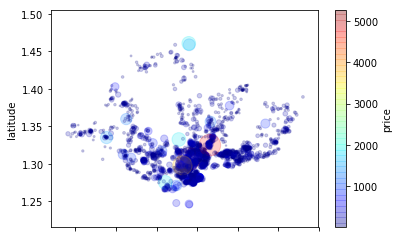

In [34]:
import pandas as pd
import matplotlib.pyplot as plt                       # graph plotting library, conventionally aliased as plt

df.plot.scatter(x = 'longitude', y = 'latitude', \
                alpha = 0.2, c = 'price', \
                colormap = 'jet', s = df['price']/10) 
# and y-axis uses latitude from df data frame; by default each dot in
# scatter plot are opaque(i.e. alpha=1.0), to make it more transparent
# set the alpha to a smaller value; c refers to the color of the dot; 
# s refers to the size of each dot
            
plt.show()                                            # show the generated graph on-screen    

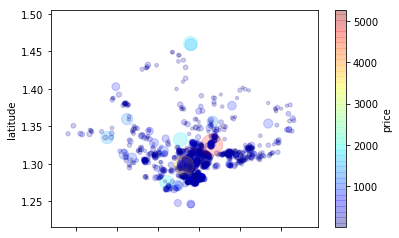

In [35]:
import numpy as np

df.plot.scatter(x = 'longitude', y = 'latitude', \
                alpha = 0.2, c = 'price', colormap = 'jet', \
                s = np.where(df['price'] < 100, 0, df['price'] / 10))
# if you want to limit the graph to showing listings with prices > 100,
# use the np.where function to set the size of the dot to zero (effectively,
# making it disappear on the graph).

plt.show()

## Lesson 4 - Data Encoding
------
Most machine learning algorithms work on numeric values only, so there is a need to encode strings/texual data as numbers. The open source library, scikit-learn, provides many encoders for data transformations, including text-to-number encoders, such as LabelEncoder and OneHotEncoder.

### 4.1. scikit-learn LabelEncoder

In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()                          # create a new label encoder, which transforms text
                                                        # string list into integer list 
label_encoder.fit(df['neighborhood'])                   # make the encoder "learn" about the data it needs to handle
encoded = label_encoder.transform(df['neighborhood'])   # encode the data based on what the encoder has "learnt"

### 4.2. scikit-learn OneHotEncoder
Because the neighborhood feature/column has no inherent hierarchy/ordering (e.g. neighbouhood MK01 is not necessarily better than MK02, or MK02 is not better than MK01), we need to further transform the encoded neighborhood by doing one-hot encoding. One-hot encoding will transform an integer list into a sparse matrix, where each colmn corresponds to a unique integral value and each row only has one column with the integer 1 (all other columns in the row will have the value zero).

In [49]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()                       # create a new one-hot encoder
reshaped = encoded.reshape(-1, 1)                       # one-hot encoder works on list of lists of integer, e.g., [[1],[2]]
                                                        # thus we need to reshape encoded(which is just a list of intergers)
                                                        # as a list of lists of integer

one_hot_encoder.fit(reshaped)
oh_encoded = one_hot_encoder.transform(reshaped)

# oh_encoded is sparse matrix (where most values are zeroes), we need to transform it into a data-frame 
# so that we can combine this with the original data-frame

smdf = pd.DataFrame(oh_encoded.todense(), \
                    columns = label_encoder.classes_)   # create a new data-frame with oh_encoded as the data (rows and
                                                        # columns), and use list captured as classes_ (with a trailing
                                                        # underscore) from label_encoder as the column names. Things
                                                        # encoders "learnt" are stored in variables with a trailing
                                                        # underscore that we can access and use.

d = df.join(smdf)                                       # combine the original data-frame and the newly created smdf
                                                        # data-frame (side-by-side) and store it in variable d; 
del d['neighborhood']                                   # delete the column 'neighborhood' from d

### 4.3. scikit-learn LabelBinarizer
We can do the label- and one-hot-encoding in one shot with LabelBinarizer

In [50]:
from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()
binarizer.fit(df['neighborhood'])
encoded = binarizer.transform(df['neighborhood'])
smdf1 = pd.DataFrame(encoded, columns = binarizer.classes_)

binarizer = LabelBinarizer()
binarizer.fit(df['room_type'])
encoded = binarizer.transform(df['room_type'])
smdf2 = pd.DataFrame(encoded, columns = binarizer.classes_)
d = df.join(smdf1).join(smdf2)

### 4.4. running script

In [55]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

pd.options.display.max_rows = 10                         # display at most 10 rows of data
pd.options.display.max_columns = 10                      # display at most 10 columns of data
pd.options.display.width = 30                            # use up to 100 columns in the terminal/interpreter
pd.options.display.float_format = lambda n : '%.2f' %n   # all numeric values will always display up to 2 decimal places

def load_data():
    df = pd.read_csv(                                    # the function to load csv files
        'tomslee_airbnb_singapore_0116_2015-06-28.csv',  # the filename
        delimiter = ',',                                 # indicate delimiter 
        na_values = ['?'])                               # tell pandas to treat the string '?' as NA value 

    df = df.drop(['bedrooms', 'room_id', 'host_id', \
                  'reviews', 'overall_satisfaction', \
                  'accommodates', 'borough', 'minstay',\
                  'last_modified'], axis=1)              # drop unnecessary columns
    return df

def encode_data(df):
    binarizer = LabelBinarizer()
    binarizer.fit(df['neighborhood'])
    encoded = binarizer.transform(df['neighborhood'])
    smdf1 = pd.DataFrame(encoded, columns = binarizer.classes_)

    binarizer = LabelBinarizer()
    binarizer.fit(df['room_type'])
    encoded = binarizer.transform(df['room_type'])
    smdf2 = pd.DataFrame(encoded, columns = binarizer.classes_)
    d = df.join(smdf1).join(smdf2)

if __name__ == '__main__':
    df = load_data()
    df_encoded = encode_data(df)

## Lesson 5 - Data Scaling

Quick tip: scikit-learn has a vary consistent API; you can accomplish a lot by following the steps below:
1. Create an instance (of whatever you want to use for processing the data, e.g., LabelBinarizer, OneHotEncoder, MinMaxScaler)
2. Fit the instance with data: makes it learn from the data, e.g., calling .fit() on an MinMaxScaler instance makes it learn the min and max of the features
3. Transform data with the fit/learned instance: makes the actual transformation on the data

The theory on scaling: As it is common to have different value ranges for different features, we do not want certain features to have undur influence on the prediction. While most machine learning algorithms can deals with different value ranges for different features, it still is better to scale them to use similar/same value ranges (e.g., 0 to 1) because it is:
1. Computationally more efficient when calculating the weights
2. Easier to determine which features are more important by looking at the weights computed

For example, in linear regression, when the features values are scaled and the weights for three features are 0.8, 0.1, and 0.3, we can tell intuitively thta the first feature has a strong positive correlation with the target value (value of this feature increases together with the target value).

### 5.1. MinMax scaler
MinMax scalers is extremely sensitive to outlier values, but its main advantage is that you can control the target range you want to scale to.

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()                            # create an instance of the scaler, by default, the scaled range is 0-1

# assuming df contains only numeric features, i.e., no categorical/textual/string features
df_clean = df.drop(['room_type', 'neighborhood'],\
                   axis = 1)
scaler.fit(df_clean)                               # let the scaler "learn" from the data what the min and max values are
scaled_df = scaler.transform(df_clean)             # scale the values to make them "fit" inside the range 0 and 1

### 5.2. Standardization scaler
Standardization scaler is less sensitive to outlier values when there are enough data, but you can't control the target range. Standardization scaler works by calculating the average and the standard deviation from the data, and apply (x - average) / std_dev for each x in the data.

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                            

df_clean = df.drop(['room_type', 'neighborhood'],axis = 1)
scaler.fit(df_clean)                               
scaled_df = scaler.transform(df_clean) 

It is perfectly okay to use both scalers in the same data-frame for different features when you deem necessary. Which scaler to use depends on the data you have.

## Lesson 6 - Data Stratifying

### 6.1. scikit-learn train_test_split
train_test_split randomly splits the dataset, by default, the train/test ratio is 3-1 (75%/25%).

Sometimes, there are certain ratios we want to maintain because such ratios influences results, e.g., if the male/female ratio in SG is 40%/60%, then any reputable survey should try to maintain as much as possible that 40% of the respondents are male and 60% female. After all, it is impossible (cost-wise, operationally, etc) to make everyone in SG to participate in surveys; therefore, surveying a sample size of the entire population is commonly practiced. Only by maintaining such ratios would make statements like "40% of males in SG feel that..." believable (as long as the sample population is large enough; such statements are still questionable when there are only 10 participants in the sample population). Such sampling is called stratified sampling.

...|...|Male|Female
---| --- |--- |---
80% of entire population|Training Data|40%|60%
20% of entire population|Testing Data|40%|60%

When such ratios are necessary and when training the machine learning algorithm from such stratified samples, the trained model can predict unseen values better becuase it captures the ratio present in the entire dataset.

In [80]:
from  sklearn.model_selection import train_test_split

# split given data into training and testing sets
trainX, testX = train_test_split(df,\
                                 test_size=0.2,\
                                 random_state = 42)         # make 20% of data as testing set
                                                            # set the random number generator with 42 as seed so that every
                                                            # time when this is run with the same data, the result will be
                                                            # the same.

trainX, testX = train_test_split(df, \
                                 stratify=df['room_type'],\
                                 test_size=0.2,\
                                 random_state = 42)         # stratified split by room_type


### 6.2. running script

In [87]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from  sklearn.model_selection import train_test_split

pd.options.display.max_rows = 10                         # display at most 10 rows of data
pd.options.display.max_columns = 10                      # display at most 10 columns of data
pd.options.display.width = 30                            # use up to 100 columns in the terminal/interpreter
pd.options.display.float_format = lambda n : '%.2f' %n   # all numeric values will always display up to 2 decimal places

def load_data():
    df = pd.read_csv(                                    # the function to load csv files
        'tomslee_airbnb_singapore_0116_2015-06-28.csv',  # the filename
        delimiter = ',',                                 # indicate delimiter 
        na_values = ['?'])                               # tell pandas to treat the string '?' as NA value 

    df = df.drop(['bedrooms', 'room_id', 'host_id', \
                  'reviews', 'overall_satisfaction', \
                  'accommodates', 'borough', 'minstay',\
                  'last_modified'], axis=1)              # drop unnecessary columns
    return df

def encode_data(df):
    '''encode data using LabelBinarizer'''
    binarizer = LabelBinarizer()
    binarizer.fit(df['neighborhood'])
    encoded = binarizer.transform(df['neighborhood'])
    smdf1 = pd.DataFrame(encoded, columns = binarizer.classes_)

    binarizer = LabelBinarizer()
    binarizer.fit(df['room_type'])
    encoded = binarizer.transform(df['room_type'])
    smdf2 = pd.DataFrame(encoded, columns = binarizer.classes_)
    d = df.join(smdf1).join(smdf2)
    
    return d

def stratify_data(df):
    trainX, testX = train_test_split(df, \
                                 stratify=df['room_type'],\
                                 test_size=0.2,\
                                 random_state = 42)         # stratified split by room_type
    return trainX, testX
    
if __name__ == '__main__':
    df = load_data()
    df_encoded = encode_data(df)